In [4]:
!pip install featurewiz

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , mean_squared_error
from featurewiz import featurewiz
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('materials.csv')

df.drop(columns=['material_id', 'formula_pretty', 'Unnamed: 0'], axis=1, inplace=True)

df.dropna(inplace=True)

label_encoder = LabelEncoder()

df['is_magnetic'] = label_encoder.fit_transform(df['is_magnetic'])
df['ordering'] = label_encoder.fit_transform(df['ordering'])

In [15]:
scaler = StandardScaler()

scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)

In [7]:
X = scaled_df.drop(['band_gap'],axis=1)

y = scaled_df['band_gap']

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2,random_state=1)

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
    Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
    Single_Label Regression problem 
    Loaded train data. Shape = (46823, 10)
    Single_Label Regression problem 
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
    Single_Label Regression problem 
    loading a sequential sample of 10000 rows into pandas for EDA
#######################################################################

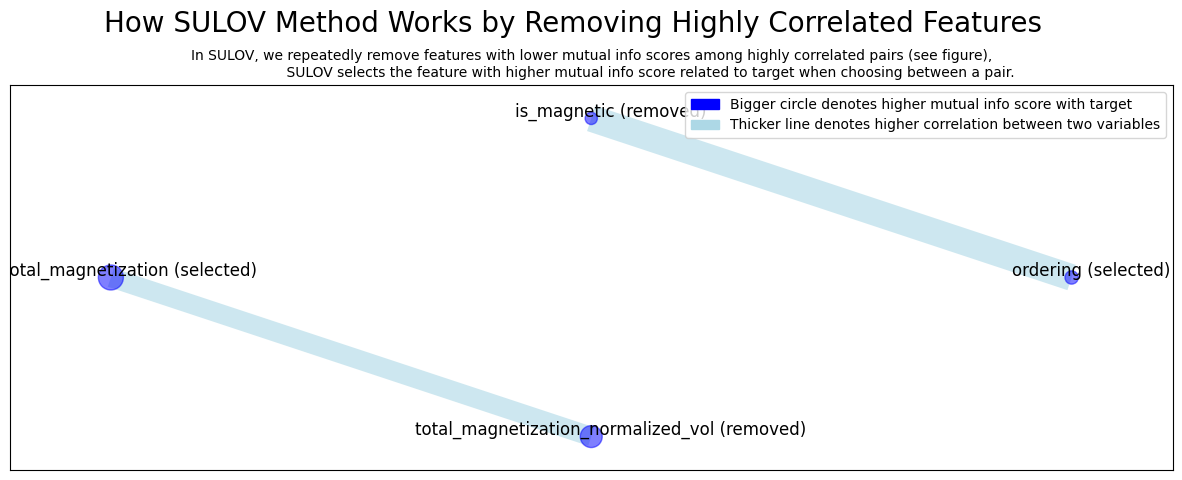

Time taken for SULOV method = 3 seconds
    Adding 0 categorical variables to reduced numeric variables  of 7
Final list of selected 7 vars after SULOV = ['nelements', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'efermi', 'total_magnetization', 'ordering']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
    Taking top 2 features per iteration...
    Number of booster rounds = 100
        Selected: ['formation_energy_per_atom', 'efermi', 'total_magnetization']
            Time taken for regular XGBoost feature selection = 21 seconds
        Selected: ['formation_energy_per_atom', 'efermi', 'total_magnetization']
            Time taken for regular XGBoost feature

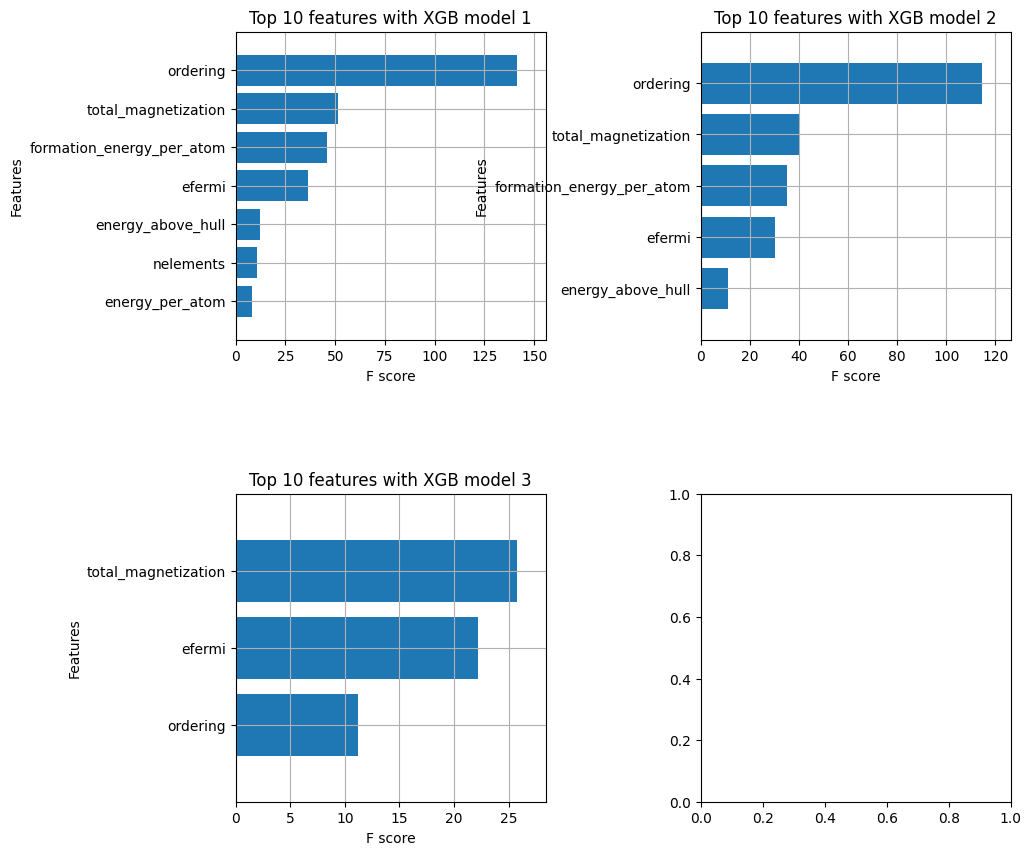

    Completed XGBoost feature selection in 66 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 3 important features:
['formation_energy_per_atom', 'efermi', 'total_magnetization']
Total Time taken for featurewiz selection = 69 seconds
Output contains a list of 3 important features and a train dataframe
['formation_energy_per_atom', 'efermi', 'total_magnetization']


In [10]:

target = 'band_gap'

features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

print(features)

In [11]:
from featurewiz import FeatureWiz
fwiz = FeatureWiz(feature_engg = '', nrows=None, transform_target=True, scalers="std",
        		category_encoders="auto", add_missing=False, verbose=0, imbalanced=False,
                ae_options={})
X_train_selected, y_train = fwiz.fit_transform(X_train, pd.DataFrame(y_train))
X_test_selected = fwiz.transform(X_valid)

fwiz.features

featurewiz is given 0.9 as correlation limit...
    Skipping feature engineering since no feature_engg input...
    final list of category encoders given: ['onehot', 'label']
    final list of scalers given: [std]
Loaded input data. Shape = (37458, 9)
#### Starting featurewiz transform for train data ####
    Regression models don't need targets to be transformed to numeric...
    Single_Label Regression problem 
Shape of dataset: (37458, 9). Now we classify variables into different types...
Time taken to define data pipeline = 1 second(s)
No model input given...
Lazy Transformer Pipeline created...
    Time taken to fit dataset = 1 second(s)
    Time taken to transform dataset = 1 second(s)
    Shape of transformed dataset: (37458, 9)
    Single_Label Regression problem 
Starting SULOV with 9 features...
    there are no null values in dataset...
    there are no null values in target column...
Completed SULOV. 8 features selected
Performing recursive XGBoost feature selection from 8 

['formation_energy_per_atom',
 'efermi',
 'total_magnetization_normalized_vol',
 'ordering']

In [13]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = RandomForestRegressor()

rfe_selector = RFE(estimator=model, n_features_to_select=5)

X_new = rfe_selector.fit_transform(X, y)

selected_features = rfe_selector.support_

In [14]:
print(X.columns[selected_features])

Index(['energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull',
       'efermi', 'total_magnetization_normalized_vol'],
      dtype='object')
